# COMP40370 Practical 1 (Part B)

***

### Imports

In [123]:
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

***

## Question 1: Outliers removal and transformation

***

> Read in diabetes.csv

In [124]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


####  &#x2611; A. What are the kurtosis and skewness values of the Insulin attribute?

In [125]:
print("Insulin Kurtosis: %f." % (kurtosis(df['Insulin'])))
print("Insulin Skewness: %f." % (skew(df['Insulin'])))

Insulin Kurtosis: 7.212285.
Insulin Skewness: 2.264073.


Kurtosis measures how symmetrical the values are and skewness measures how skewed either way (positively or negatively) values that aren't symmetrical are. 

The pandas kurtosis() formula is: kurtosis = (sum((x - mean) ** 4) / n) / (standard deviation ** 4). 
The pandas skew() formula is: skewness = (3 * (mean - median)) / standard deviation

####  &#x2611; B. Filter the dataframe and select only the rows where Insulin is not equal to 0, and use the new version (filtered dataframe) for the rest of the practical



In [126]:
df_2 = df.copy() #DF_2 will contain all columns from DF, but rows where Insulin equals zero will be removed
df_2 = df_2[df_2['Insulin'] != 0]
df_2 = df_2.reset_index(drop=True)
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94,28.1,0.167,21,0
1,0,137,40.0,35,168,43.1,2.288,15,1
2,3,78,50.0,32,88,31.0,0.248,26,1
3,2,197,70.0,45,543,30.5,0.158,53,1
4,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0
400,1,140,74.0,26,180,24.1,0.828,23,0
401,1,144,82.0,46,180,46.1,0.335,46,1
402,2,121,70.0,32,95,39.1,0.886,23,0


In [127]:
print("df_2 has %d less rows than the original dataframe (df)." % (df.shape[0]-df_2.shape[0]))

df_2 has 384 less rows than the original dataframe (df).


The dataframe "df_2" has now been created in order to preserve the original dataset. All rows with an Insulin value of 0 have been removed in this new dataframe. A total of 384 rows were removed.

#### &#x2611; C. Draw the histogram of Insulin column along with kernel density estimation (KDE) curb.

In [128]:
avg_insulin = df_2['Insulin'].mean()
print("Average Insulin Level is: %d" % (avg_insulin))
lowest_insulin = df_2['Insulin'].min()
print("Lowest Insulin Level is: %d" % (lowest_insulin))
highest_insulin = df_2['Insulin'].max()
print("Highest Insulin Level is: %d" % (highest_insulin))

Average Insulin Level is: 155
Lowest Insulin Level is: 14
Highest Insulin Level is: 846


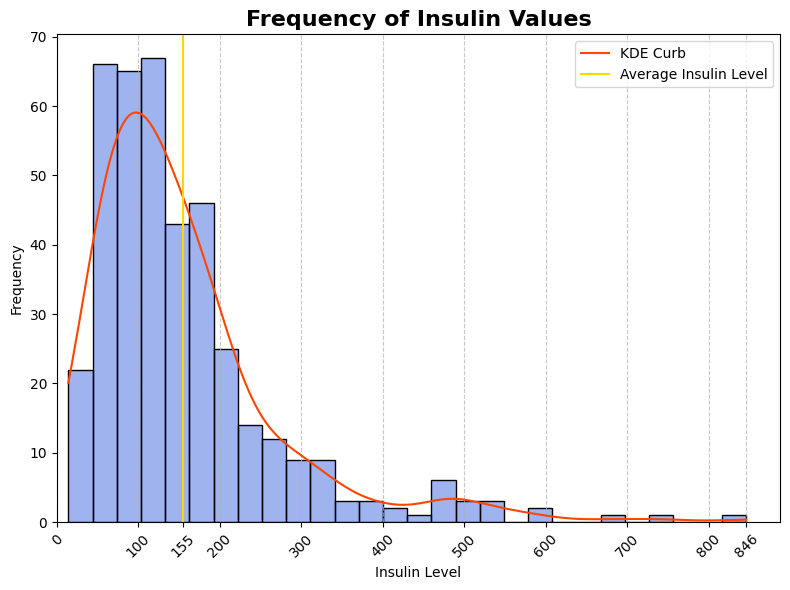

In [129]:
# Plot 1
fig_1, ax_1 = plt.subplots(figsize=(8,6)) #Subplots

ax_1 = sns.histplot(df_2["Insulin"], color='royalblue', kde=True) #Define Histogram 
ax_1.lines[0].set_color('orangered') #Set the first line's (KDE curb) color
ax_1.lines[0].set_label('KDE Curb') #
ax_1.axvline(df_2['Insulin'].mean(), color='gold', label='Average Insulin Level')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.title('')
plt.legend()
ax_1.set_title('Frequency of Insulin Values', fontweight='bold', fontsize=16)
ax_1.set_xlim(left=0)
ax_1.grid(axis='x', linestyle='--', alpha=0.7)
xticks = [0, 100, avg_insulin, 200, 300, 400, 500, 600, 700, 800, highest_insulin]
xtick_labels = ['0', '100', '155', '200', '300', '400', '500', '600', '700', '800', '846']
plt.xticks(xticks, xtick_labels, rotation=45)
fig_1.tight_layout()
plt.show()

We find that the average Insulin Level is 155. While not in the center of the KDE curb, the mean line still appears pretty close to the most frequent insulin levels. This histogram shows that the majority of the patients records have insulin values in the sub 200 range. I included the mean of the insulin column's values in order to provide more understanding of where most patients are. 

#### &#x2611; D. Identify outliers of Insulin using Inter Quartile Range (IQR) approach and impute them with lower band and upper band values appropriately (any outliers above the upper band, replace it with the value of upper band, and any outliers below the lower band, replace it with the value of the lower band). Then draw the histogram again to observe the difference


> Identify outliers using IQR approach. 


In [130]:
Insulin_Q1 = df_2['Insulin'].quantile(0.25) #Getting the first quantile
Insulin_Q3 = df_2['Insulin'].quantile(0.75) #Getting the third quantile
Insulin_IQR = Insulin_Q3 - Insulin_Q1 #Finding IQR by subtracing Q1 from Q3
print(Insulin_IQR)

113.0


In [131]:
threshold = 1.5 #Normal threshold

#Find the Lower and Upper Bounds
Insulin_lower_bound = Insulin_Q1 - threshold * Insulin_IQR
Insulin_upper_bound = Insulin_Q3 + threshold * Insulin_IQR

#Identify and store Outliers
Insulin_outliers = df_2[(df_2['Insulin'] < Insulin_lower_bound) | (df_2['Insulin'] > Insulin_upper_bound)]

print("Lower Bound is: %f" % (Insulin_lower_bound))
print("Upper Bound is: %f" % (Insulin_upper_bound))
print("I found %d outliers after using the IQR approach." % (len(Insulin_outliers)))

Lower Bound is: -92.500000
Upper Bound is: 359.500000
I found 25 outliers after using the IQR approach.


> Replace upper and lower bands with values of upper and low bands. 

In [132]:
df_3 = df_2.copy() #DF_3 will contain Insulin outliers with reassigned lower/upper bounds
df_3 = df_3.reset_index(drop=True)
df_3['Insulin'] = df_3['Insulin'].apply(lambda x: Insulin_lower_bound if x < Insulin_lower_bound else (Insulin_upper_bound if x > Insulin_upper_bound else x))
df_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94.0,28.1,0.167,21,0
1,0,137,40.0,35,168.0,43.1,2.288,15,1
2,3,78,50.0,32,88.0,31.0,0.248,26,1
3,2,197,70.0,45,359.5,30.5,0.158,53,1
4,1,189,60.0,23,359.5,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205.0,33.2,0.591,25,0
400,1,140,74.0,26,180.0,24.1,0.828,23,0
401,1,144,82.0,46,180.0,46.1,0.335,46,1
402,2,121,70.0,32,95.0,39.1,0.886,23,0


> Draw a new histogram

In [133]:
print("Average Insulin Level is: %d" % (df_3['Insulin'].mean()))

Average Insulin Level is: 146


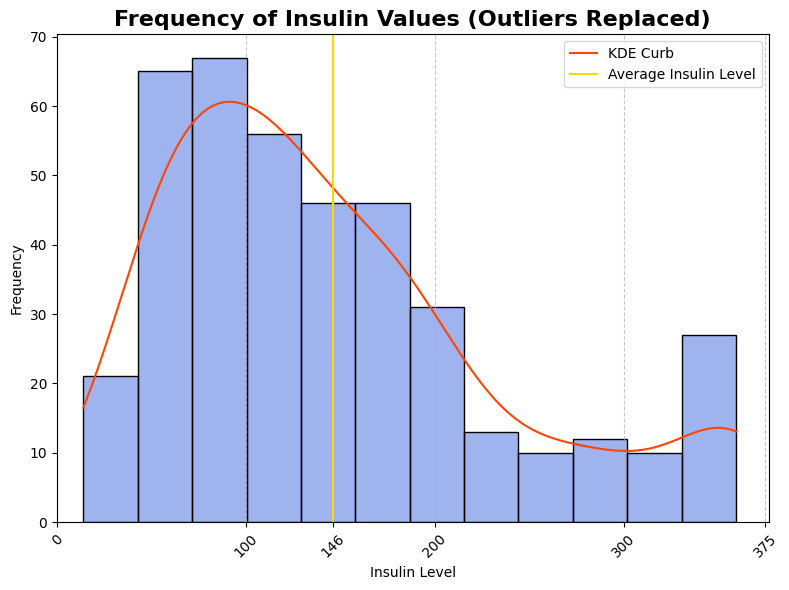

In [134]:
# Plot 2: (Outliers replaced with bound values)
fig_2, ax_2 = plt.subplots(figsize=(8,6))

ax_2 = sns.histplot(df_3["Insulin"], color='royalblue', kde=True)
ax_2.lines[0].set_color('orangered') #Set the first line's (KDE curb) color
ax_2.lines[0].set_label('KDE Curb') #
ax_2.axvline(df_3['Insulin'].mean(), color='gold', label='Average Insulin Level')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.legend()
ax_2.set_title('Frequency of Insulin Values (Outliers Replaced)', fontweight='bold', fontsize=16)
ax_2.set_xlim(left=0)
ax_2.grid(axis='x', linestyle='--', alpha=0.7)
xticks = [0, 100, df_3['Insulin'].mean(), 200, 300, 375]
xtick_labels = ['0', '100', '146', '200', '300', '375']
plt.xticks(xticks, xtick_labels, rotation=45)
fig_2.tight_layout()
plt.show()


In part D, I identified the outliers and replaced them with the lower and upper bound values. This in effect "normalizes" the values in this column so that there are no outliers. 

#### &#x2611; E. Transform Insulin column using $\log_e$(x+1) formula to make the Insulin values follow the normal distribution.

In [135]:
df_4 = df_3.copy() #df_4 will have an Insulin column with a log formula applied to it
df_4 = df_4.reset_index(drop=True)
df_4['Insulin'] = df_4['Insulin'].apply(lambda x: np.log(x + 1))
df_4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,4.553877,28.1,0.167,21,0
1,0,137,40.0,35,5.129899,43.1,2.288,15,1
2,3,78,50.0,32,4.488636,31.0,0.248,26,1
3,2,197,70.0,45,5.887492,30.5,0.158,53,1
4,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,5.327876,33.2,0.591,25,0
400,1,140,74.0,26,5.198497,24.1,0.828,23,0
401,1,144,82.0,46,5.198497,46.1,0.335,46,1
402,2,121,70.0,32,4.564348,39.1,0.886,23,0


In an attempt to normalize values even greater in the insulin column, I have applied $\log_e$(x+1) to the Insulin column. 

#### &#x2611; F. Find the kurtosis and skewness of Insulin after the transformation

In [136]:
print("DF_4 Insulin Kurtosis: %f." % (kurtosis(df_4['Insulin'])))
print("DF_4 Insulin Skewness: %f." % (skew(df_4['Insulin'])))

DF_4 Insulin Kurtosis: 0.031295.
DF_4 Insulin Skewness: -0.392778.


#### &#x2611; G. Draw two QQ-plots to compare before and after the $\log_e$(x+1) transformation for Insulin column.

> Before Formula: DF_3

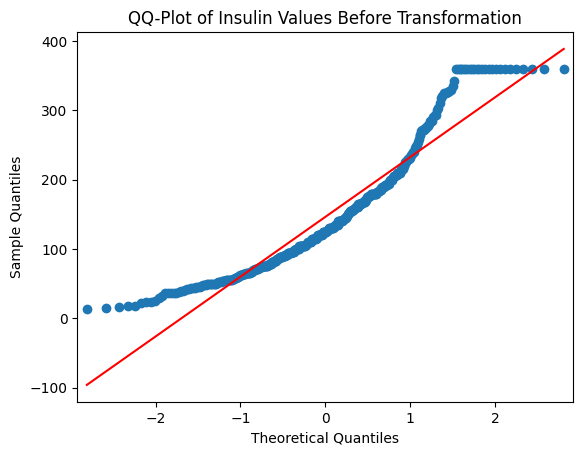

In [137]:
sm.qqplot(df_3['Insulin'],  line='r')
plt.title('QQ-Plot of Insulin Values Before Transformation')
plt.show()

> After Formula: DF_4

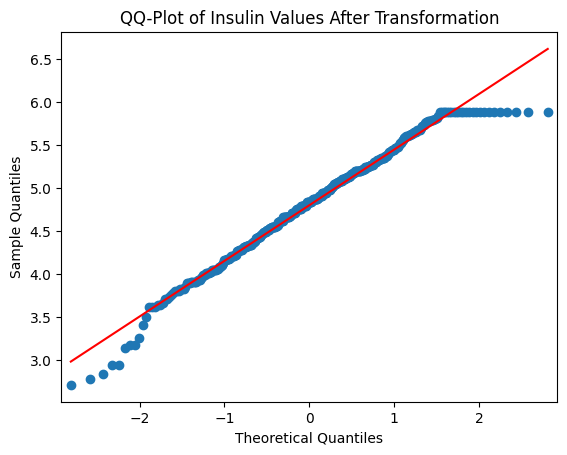

In [138]:
sm.qqplot(df_4['Insulin'], line='r')
plt.title('QQ-Plot of Insulin Values After Transformation')
plt.show()

After transforming the values in the Insulin column, I am able to notice that the insulin values that have been transformed with $\log_e$(x+1) are significantly closer in general to the 45 degree line. This shows us that the insulin values are more normalized. 

#### &#x2611; H. Similarly detect and correct outliers (step d) in the 'Glucose','BloodPressure' and 'SkinThickness' columns.

> Glucose Column Outliers Detection

In [139]:
Glucose_Q1 = df_2['Glucose'].quantile(0.25)
Glucose_Q3 = df_2['Glucose'].quantile(0.75)
Glucose_IQR = Glucose_Q3 - Glucose_Q1
print(Glucose_IQR)

Glucose_lower_bound = Glucose_Q1 - threshold * Glucose_IQR
Glucose_upper_bound = Glucose_Q3 + threshold * Glucose_IQR

Glucose_outliers = df_2[(df_2['Glucose'] < Glucose_lower_bound) | (df_2['Glucose'] > Glucose_upper_bound)]
print("Lower Bound is: %f" % (Glucose_lower_bound))
print("Upper Bound is: %f" % (Glucose_upper_bound))
print("I found %d outliers after using the IQR approach." % (len(Glucose_outliers)))
print(Glucose_outliers)

44.0
Lower Bound is: 33.000000
Upper Bound is: 209.000000
I found 1 outliers after using the IQR approach.
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            1        0           74.0             20       23  27.7   

    DiabetesPedigreeFunction  Age  Outcome  
88                     0.299   21        0  


> BloodPressure Column Outliers Detection

In [140]:
BloodPressure_Q1 = df_2['BloodPressure'].quantile(0.25)
BloodPressure_Q3 = df_2['BloodPressure'].quantile(0.75)
BloodPressure_IQR = BloodPressure_Q3 - BloodPressure_Q1
print(BloodPressure_IQR)

BloodPressure_lower_bound = BloodPressure_Q1 - threshold * BloodPressure_IQR
BloodPressure_upper_bound = BloodPressure_Q3 + threshold * BloodPressure_IQR

BloodPressure_outliers = df_2[(df_2['BloodPressure'] < BloodPressure_lower_bound) | (df_2['BloodPressure'] > BloodPressure_upper_bound)]
print("Lower Bound is: %f" % (BloodPressure_lower_bound))
print("Upper Bound is: %f" % (BloodPressure_upper_bound))
print("I found %d outliers after using the IQR approach." % (len(BloodPressure_outliers)))
print(BloodPressure_outliers)

16.0
Lower Bound is: 38.000000
Upper Bound is: 102.000000
I found 7 outliers after using the IQR approach.
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7              1      103           30.0             38       83  43.3   
19             9      171          110.0             24      240  45.4   
57             1       88           30.0             42       99  55.0   
86             0      129          110.0             46      130  67.1   
309            1       89           24.0             19       25  27.8   
343            8      167          106.0             46      231  37.6   
349           10       68          106.0             23       49  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.183   33        0  
19                      0.721   54        1  
57                      0.496   26        1  
86                      0.319   26        1  
309                     0.559   21        0  
343                     

> SkinThickness Column Outliers Detection

In [141]:
SkinThickness_Q1 = df_2['SkinThickness'].quantile(0.25)
SkinThickness_Q3 = df_2['SkinThickness'].quantile(0.75)
SkinThickness_IQR = SkinThickness_Q3 - SkinThickness_Q1
print(SkinThickness_IQR)

SkinThickness_lower_bound = SkinThickness_Q1 - threshold * SkinThickness_IQR
SkinThickness_upper_bound = SkinThickness_Q3 + threshold * SkinThickness_IQR

SkinThickness_outliers = df_2[(df_2['SkinThickness'] < SkinThickness_lower_bound) | (df_2['SkinThickness'] > SkinThickness_upper_bound)]
print("Lower Bound is: %f" % (SkinThickness_lower_bound))
print("Upper Bound is: %f" % (SkinThickness_upper_bound))
print("I found %d outliers after using the IQR approach." % (len(SkinThickness_outliers)))
print(SkinThickness_outliers)

16.0
Lower Bound is: -3.000000
Upper Bound is: 61.000000
I found 1 outliers after using the IQR approach.
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
227            0      180           78.0             63       14  59.4   

     DiabetesPedigreeFunction  Age  Outcome  
227                      2.42   25        1  


> Column Outliers Correction

In [142]:
df_5 = df_3.copy() #df_5 will contain values from df_3, the dataframe that has had insulin zero records removed (df_2) and insulin outliers corrected (df_3)
df_5 = df_5.reset_index(drop=True)
df_5['Glucose'] = df_5['Glucose'].apply(lambda x: Glucose_lower_bound if x < Glucose_lower_bound else (Glucose_upper_bound if x > Glucose_upper_bound else x))
df_5['BloodPressure'] = df_5['BloodPressure'].apply(lambda x: BloodPressure_lower_bound if x < BloodPressure_lower_bound else (BloodPressure_upper_bound if x > BloodPressure_upper_bound else x))
df_5['SkinThickness'] = df_5['SkinThickness'].apply(lambda x: SkinThickness_lower_bound if x < SkinThickness_lower_bound else (SkinThickness_upper_bound if x > SkinThickness_upper_bound else x))
df_5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,15,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,359.5,30.5,0.158,53,1
4,1,189.0,60.0,23.0,359.5,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129.0,74.0,26.0,205.0,33.2,0.591,25,0
400,1,140.0,74.0,26.0,180.0,24.1,0.828,23,0
401,1,144.0,82.0,46.0,180.0,46.1,0.335,46,1
402,2,121.0,70.0,32.0,95.0,39.1,0.886,23,0


> Verify that Outliers are replaced

In [143]:
#Make lists of outliers
Insulin_O_list = Insulin_outliers['Insulin'].tolist()
Glucose_O_list = Glucose_outliers['Glucose'].tolist()
BloodPressure_O_list = BloodPressure_outliers['BloodPressure'].tolist()
SkinThickness_O_list = SkinThickness_outliers['SkinThickness'].tolist()
#Make lists of dataframe after replacing values
Insulin_df5 = df_5['Insulin'].tolist()
Glucose_df5 = df_5['Glucose'].tolist()
BloodPressure_df5 = df_5['BloodPressure'].tolist()
SkinThickness_df5 = df_5['SkinThickness'].tolist()

In [144]:
set1 = set(Insulin_O_list)
set2 = set(Insulin_df5)
if set1.isdisjoint(set2): 
    print("Insulin outliers have been replaced")
else: 
    print("Insulin outliers have NOT been replaced")
set1 = set(Glucose_O_list)
set2 = set(Glucose_df5)
if set1.isdisjoint(set2): 
    print("Glucose outliers have been replaced")
else: 
    print("Glucose outliers have NOT been replaced")
set1 = set(BloodPressure_O_list)
set2 = set(BloodPressure_df5)
if set1.isdisjoint(set2): 
    print("BloodPressure outliers have been replaced")
else: 
    print("BloodPressure outliers have NOT been replaced")
set1 = set(SkinThickness_O_list)
set2 = set(SkinThickness_df5)
if set1.isdisjoint(set2): 
    print("SkinThickness outliers have been replaced")
else: 
    print("SkinThickness outliers have NOT been replaced")


Insulin outliers have been replaced
Glucose outliers have been replaced
BloodPressure outliers have been replaced
SkinThickness outliers have been replaced


Repeating the process from identifying and replacing outliers in the Insulin column, Glucose/BloodPressure/SkinThickness have now also had the same process done. A final dataframe, df_5, has been made with these replaced values. I verified that all outliers were not present in the final dataframe, meaning they were all replaced. 

#### &#x2611; I. Display the correlation matrix using the seaborn heatmap function between continuous variables; Pregnancies, Glocose, BloodPressure, SkinThickness, Insulin, BMI, Age.

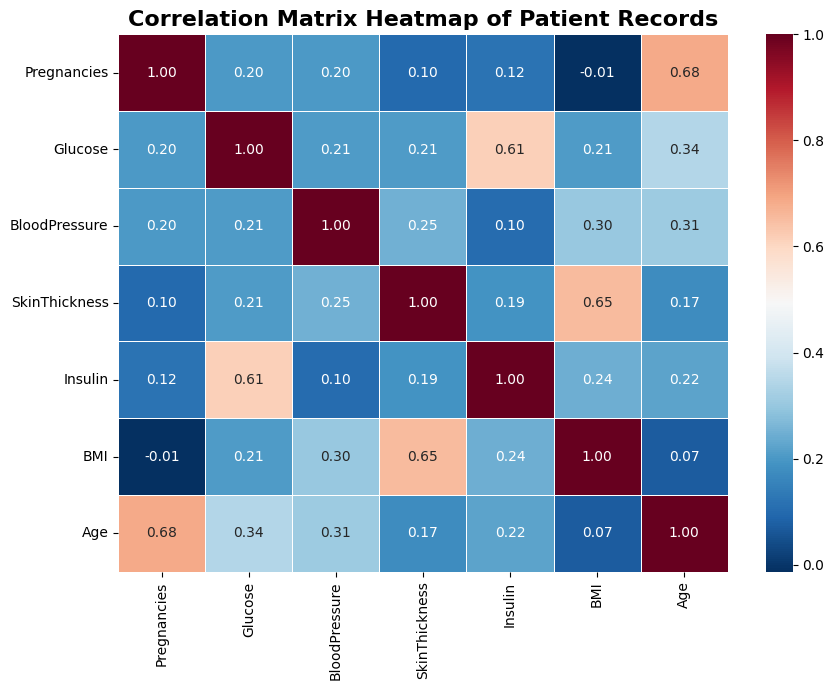

In [145]:
#PLot 3: Seaborn Correlation Matrix Heatmap
fig_3, ax_3 = plt.subplots(figsize=(9,7)) 
matrix_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
matrix_corr = df_5[columns].corr()
ax_3 = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
ax_3.set_title('Correlation Matrix Heatmap of Patient Records', fontweight='bold', fontsize=16)
fig_3.tight_layout() 
plt.show()

This correlation matrix heatmap shows us 3 strong correlations with similar values in our datset of patients records. Insulin & Glucose, BMI & SkinThickness, and Age & Pregnancies have strong correlations all within 0.61-0.68 in the dataset. DF_5 was used as it contains outliers with replaced values even though Practical 1 clarifications post on Brightspace said to use the insulin values with zero removed dataset (df_2 here) as I believed df_5 would provide stronger correlations. 

***

## Question 2: Data Processing

***

In [146]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94,28.1,0.167,21,0
1,0,137,40.0,35,168,43.1,2.288,15,1
2,3,78,50.0,32,88,31.0,0.248,26,1
3,2,197,70.0,45,543,30.5,0.158,53,1
4,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0
400,1,140,74.0,26,180,24.1,0.828,23,0
401,1,144,82.0,46,180,46.1,0.335,46,1
402,2,121,70.0,32,95,39.1,0.886,23,0


#### &#x2611; A. Group the patients by number of pregnancies, along with their average BloodPressure.

In [147]:
df_6 = df_2.groupby('Pregnancies')['BloodPressure'].mean().reset_index()
df_6['BloodPressureAvg'] = df_6['BloodPressure']
df_6.drop(columns=['BloodPressure'], inplace=True)
df_6

,Pregnancies,BloodPressureAvg
0,0,73.403509
1,1,68.148936
2,2,66.107692
3,3,70.177778
4,4,70.458333
5,5,73.300000
6,6,67.052632
7,7,72.476190
8,8,78.571429
9,9,81.333333


I have formed a new dataframe, df_6, which shows the patient's records grouped by Preganacies and their Blood Pressure values averaged based on number of pregnancies. This shows us an average blood pressure for the number of pregnancies a patient has had. 

#### &#x2611; B. Group the patients by number of pregnancies, along with the average age, sum of all ages in that group, and the count of patients in that group

In [148]:
#Using an aggregate function, we can groupby and perform calculations on the records
df_7 = df_2.groupby('Pregnancies').agg({'Age': ['mean', 'sum', 'count']}).reset_index()
df_7.columns = ['Pregnancies', 'AgeAvg', 'AgeSum', 'Count']
df_7

,Pregnancies,AgeAvg,AgeSum,Count
0,0,24.258621,1407,58
1,1,27.122449,2658,98
2,2,25.194030,1688,67
3,3,28.244444,1271,45
4,4,30.407407,821,27
5,5,34.666667,728,21
6,6,38.368421,729,19
7,7,42.761905,898,21
8,8,44.714286,626,14
9,9,46.583333,559,12


> Merge df_6 and df_7 to create df_8 

In [149]:
df_8 = pd.merge(df_6, df_7, on='Pregnancies', how='inner')
df_8

,Pregnancies,BloodPressureAvg,AgeAvg,AgeSum,Count
0,0,73.403509,24.258621,1407,58
1,1,68.148936,27.122449,2658,98
2,2,66.107692,25.194030,1688,67
3,3,70.177778,28.244444,1271,45
4,4,70.458333,30.407407,821,27
5,5,73.300000,34.666667,728,21
6,6,67.052632,38.368421,729,19
7,7,72.476190,42.761905,898,21
8,8,78.571429,44.714286,626,14
9,9,81.333333,46.583333,559,12


df_7 was created and shows patient records grouped by pregnancies with their average ages, sum of ages, and count of number of records for each number of pregnancies. df_8 was then created with df_6 and df_7 merged. 

#### &#x2611; C. Add a new column named ‘BMI/Age’ with the value of BMI over the Age, without using any loops.

In [150]:
df_9 = df_2.copy()
df_9 = df_9.reset_index(drop=True)
df_9['BMI/Age'] = df_9['BMI'] / df_9['Age']
df_9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age
0,1,89,66.0,23,94,28.1,0.167,21,0,1.338095
1,0,137,40.0,35,168,43.1,2.288,15,1,2.873333
2,3,78,50.0,32,88,31.0,0.248,26,1,1.192308
3,2,197,70.0,45,543,30.5,0.158,53,1,0.575472
4,1,189,60.0,23,846,30.1,0.398,59,1,0.510169
...,...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0,1.328000
400,1,140,74.0,26,180,24.1,0.828,23,0,1.047826
401,1,144,82.0,46,180,46.1,0.335,46,1,1.002174
402,2,121,70.0,32,95,39.1,0.886,23,0,1.700000


df_9 was created with a new column showing BMI values for each patient over that patient's Age. 

#### &#x2611; D. Without looping the rows, add a new column named ‘risk’ with the following rules:
        a. High: if BMI > 45 and BloodPressure > 100
        b. Medium: if 30 < BMI < 45 and BloodPressure < 100
        c. Low: if BMI < 30
        d. Unknown: otherwise

> Create function for assigning risk to each row

In [151]:
def risk_assign(patient_record):
    if patient_record['BMI'] > 45 and patient_record['BloodPressure'] > 100:
        return 'High'
    elif 30 < patient_record['BMI'] < 45 and patient_record['BloodPressure'] < 100:
        return 'Medium'
    elif patient_record['BMI'] < 30:
        return 'Low'
    else:
        return 'Unknown'

> Apply function to dataframe and create new column

In [152]:
df_9['Risk'] = df_9.apply(risk_assign, axis=1)
df_9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk
0,1,89,66.0,23,94,28.1,0.167,21,0,1.338095,Low
1,0,137,40.0,35,168,43.1,2.288,15,1,2.873333,Medium
2,3,78,50.0,32,88,31.0,0.248,26,1,1.192308,Medium
3,2,197,70.0,45,543,30.5,0.158,53,1,0.575472,Medium
4,1,189,60.0,23,846,30.1,0.398,59,1,0.510169,Medium
...,...,...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0,1.328000,Medium
400,1,140,74.0,26,180,24.1,0.828,23,0,1.047826,Low
401,1,144,82.0,46,180,46.1,0.335,46,1,1.002174,Unknown
402,2,121,70.0,32,95,39.1,0.886,23,0,1.700000,Medium


I first defined a function called risk_assign that returns a risk as instructed by practical instructions. I then create a new column in df_9 for each patient's risk assigned by risk_assign. 

#### &#x2611; E. The file named ages.csv provides the age group names. Merge the two dataframes by the age, the resulted dataframe must contain all the columns of diabetes.csv, in addition to their age group in the column named ‘AgeGroup’.

> Read in the ages dataset

In [153]:
df_age_1 = pd.read_csv('ages.csv')
df_age_1

,Age,AgeGroup
0,1,Children
1,2,Children
2,3,Children
3,4,Children
4,5,Children
...,...,...
114,115,Senior
115,116,Senior
116,117,Senior
117,118,Senior


> Create df_10 showing merged df_9 and ages dataset

In [154]:
df_10 = pd.merge(df_9, df_age_1, on='Age', how='outer')
df_10 = df_10.dropna()
df_10

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,AgeGroup
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,1.338095,Low,Adult
1,2.0,142.0,82.0,18.0,64.0,24.7,0.761,21,0.0,1.176190,Low,Adult
2,1.0,126.0,56.0,29.0,152.0,28.7,0.801,21,0.0,1.366667,Low,Adult
3,4.0,99.0,76.0,15.0,51.0,23.2,0.223,21,0.0,1.104762,Low,Adult
4,0.0,100.0,70.0,26.0,50.0,30.8,0.597,21,0.0,1.466667,Medium,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.0,164.0,82.0,43.0,67.0,32.8,0.341,50,0.0,0.656000,Medium,Adult
400,11.0,138.0,74.0,26.0,144.0,36.1,0.557,50,1.0,0.722000,Medium,Adult
401,8.0,124.0,76.0,24.0,600.0,28.7,0.687,52,1.0,0.551923,Low,Adult
402,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52,1.0,0.640385,Medium,Adult


#### &#x2611; F. one-hot encode the categorical variable ‘AgeGroup’ and add the resulting columns to the dataframe, and remove AgeGroup.

In [155]:
df_10_one_hot = pd.get_dummies(df_10['AgeGroup'])
df_10 = df_10.join(df_10_one_hot)
df_10.drop(columns=['AgeGroup'], inplace=True)
df_10

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,Adolescent,Adult,Senior
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0,1.338095,Low,False,True,False
1,2.0,142.0,82.0,18.0,64.0,24.7,0.761,21,0.0,1.176190,Low,False,True,False
2,1.0,126.0,56.0,29.0,152.0,28.7,0.801,21,0.0,1.366667,Low,False,True,False
3,4.0,99.0,76.0,15.0,51.0,23.2,0.223,21,0.0,1.104762,Low,False,True,False
4,0.0,100.0,70.0,26.0,50.0,30.8,0.597,21,0.0,1.466667,Medium,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.0,164.0,82.0,43.0,67.0,32.8,0.341,50,0.0,0.656000,Medium,False,True,False
400,11.0,138.0,74.0,26.0,144.0,36.1,0.557,50,1.0,0.722000,Medium,False,True,False
401,8.0,124.0,76.0,24.0,600.0,28.7,0.687,52,1.0,0.551923,Low,False,True,False
402,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52,1.0,0.640385,Medium,False,True,False


A new dataframe, df_10_one_hot, was created with "one-hot" columns created from the AgeGroup column. This has turned AgeGroup column into three different columns repreenting the 3 different age groups. A patient's age group will have the value True in the column for their Age Group and False for the other two. 

***